# 모델의 성능 향상시키기

### 1. 데이터의 확인과 검증셋

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [5]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7558 - loss: 1.9709 - val_accuracy: 0.7500 - val_loss: 1.7307
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7501 - loss: 1.5994 - val_accuracy: 0.7500 - val_loss: 1.2843
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7485 - loss: 1.1191 - val_accuracy: 0.7500 - val_loss: 0.9053
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7532 - loss: 0.7874 - val_accuracy: 0.7500 - val_loss: 0.5716
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7516 - loss: 0.4918 - val_accuracy: 0.7500 - val_loss: 0.4042
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7607 - loss: 0.4053 - val_accuracy: 0.7762 - val_loss: 0.3976
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7847 - loss: 0.3702 - val_accuracy: 0.7985 - val_loss: 0.3602
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8270 - loss: 0.3357 - val_accuracy: 0.8808 - val_loss: 0.3314
Epoch 9

In [6]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9564 - loss: 0.1246 
Test accuracy: 0.9515384435653687


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 모델의 저장 설정 및 실행

In [11]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0,
                  callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.7692.keras

Epoch 2: saving model to ./data/model/all/02-0.7300.keras

Epoch 3: saving model to ./data/model/all/03-0.7685.keras

Epoch 4: saving model to ./data/model/all/04-0.8246.keras

Epoch 5: saving model to ./data/model/all/05-0.8585.keras

Epoch 6: saving model to ./data/model/all/06-0.8462.keras

Epoch 7: saving model to ./data/model/all/07-0.8762.keras

Epoch 8: saving model to ./data/model/all/08-0.8923.keras

Epoch 9: saving model to ./data/model/all/09-0.9054.keras

Epoch 10: saving model to ./data/model/all/10-0.9138.keras

Epoch 11: saving model to ./data/model/all/11-0.9200.keras

Epoch 12: saving model to ./data/model/all/12-0.9269.keras

Epoch 13: saving model to ./data/model/all/13-0.9308.keras

Epoch 14: saving model to ./data/model/all/14-0.9338.keras

Epoch 15: saving model to ./data/model/all/15-0.9354.keras

Epoch 16: saving model to ./data/model/all/16-0.9369.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [12]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9442 - loss: 0.1441
Test accuracy: 0.9430769085884094


## 3. 그래프로 과적합 확인하기

In [14]:
from tensorflow.keras.callbacks import LambdaCallback
import tensorflow as tf

# 50번마다 한 번씩 출력하는 콜백 함수
def custom_log(epoch, logs):
    if (epoch + 1) % 50 == 0:
        num_batches = len(X_train) // 500
        print(f"Epoch {epoch+1}/2000") 
        tf.print(f"{num_batches}/{num_batches} ━━━━━━━━━━━━━━━━━━━━ "
                 f"accuracy: {logs['accuracy']:.4f} - loss: {logs['loss']:.4f} - "
                 f"val_accuracy: {logs['val_accuracy']:.4f} - val_loss: {logs['val_loss']:.4f}")
show_status = LambdaCallback(on_epoch_end=custom_log)

# 그래프 확인을 위한 긴 학습
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0, callbacks=show_status)

Epoch 50/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9582 - loss: 0.1133 - val_accuracy: 0.9623 - val_loss: 0.1137
Epoch 100/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9749 - loss: 0.0833 - val_accuracy: 0.9769 - val_loss: 0.0899
Epoch 150/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9820 - loss: 0.0604 - val_accuracy: 0.9838 - val_loss: 0.0688
Epoch 200/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9851 - loss: 0.0532 - val_accuracy: 0.9862 - val_loss: 0.0623
Epoch 250/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9854 - loss: 0.0498 - val_accuracy: 0.9862 - val_loss: 0.0593
Epoch 300/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9872 - loss: 0.0472 - val_accuracy: 0.9862 - val_loss: 0.0630
Epoch 350/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9892 - loss: 0.0442 - val_accuracy: 0.9877 - val_loss: 0.0621
Epoch 400/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9877 - loss: 0.0423 - val_accuracy: 0.9838 - val_loss: 0.0641
Epoch 450/2000
10/10 ━━━━━━━━━━━━━━━━━━━━ accuracy: 0.9905 - loss: 0.0400

In [15]:
# history에 저장된 학습 결과를 확인해 보겠습니다.
hist_df=pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.943546,0.150582,0.951538,0.145386
1,0.942520,0.150171,0.951538,0.145063
2,0.943546,0.149691,0.951538,0.144617
3,0.944060,0.147804,0.953077,0.143880
4,0.945086,0.146677,0.952308,0.142740
...,...,...,...,...
1995,0.994098,0.023762,0.990000,0.056442
1996,0.993585,0.026300,0.992308,0.053771
1997,0.995124,0.021154,0.991538,0.054268
1998,0.995638,0.020580,0.990769,0.054781


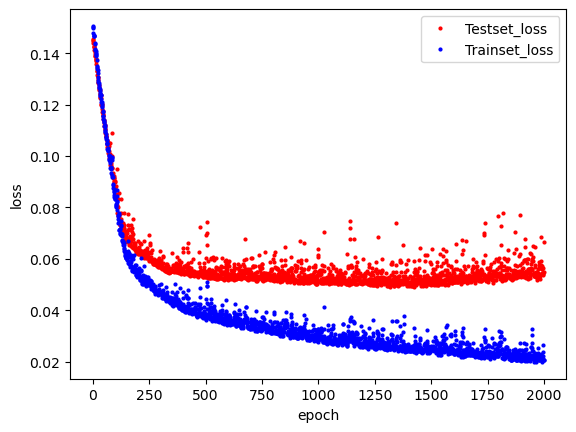

In [16]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

# 와인 데이터를 불러옵니다.
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 학습의 자동 중단 및 최적화 모델 저장

In [21]:
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/bestmodel.keras"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1,
                        callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8228 - loss: 0.4367 - val_accuracy: 0.8969 - val_loss: 0.3219
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9017 - loss: 0.3084 - val_accuracy: 0.9046 - val_loss: 0.2796
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9008 - loss: 0.2824 - val_accuracy: 0.9023 - val_loss: 0.2661
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9081 - loss: 0.2622 - val_accuracy: 0.9192 - val_loss: 0.2474
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9252 - loss: 0.2372 - val_accuracy: 0.9208 - val_loss: 0.2348
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9344 - loss: 0.2177 - val_accuracy: 0.9223 - val_loss: 0.2238
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9317 - loss: 0.2200 - val_accuracy: 0.9246 - val_loss: 0.2160
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9350 - loss: 0.1999 - val_accuracy: 0.9246 - val_lo

In [22]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.9840 - loss: 0.0447
Test accuracy: 0.9823076725006104
